# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import dtreeviz
from dtreeviz.trees import *
import graphviz

In [2]:
boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [3]:
boston.info() 

# não há variáveis booleanas, categóricas, objects. o scikitlearn não suporta variáveis categoricas e objects precisam se tornar dummies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
boston.shape

(506, 14)

In [5]:
boston.drop_duplicates().shape 

#não há linhas duplicadas

(506, 14)

In [6]:
boston.isna().sum()

# não há NA - missing values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
boston = boston.drop(columns = ['b'])
boston
# removendo a variável b por questões éticas

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [8]:
# parece não ser necessário mais nenhum tratamento na base de dados.

In [9]:
X = boston.drop(columns = ['medv']).copy()
X.head() # variáveis explicativas

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [10]:
y = boston['medv'].copy() 
y # variável resposta

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [11]:
boston.corr() #plotando df de corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


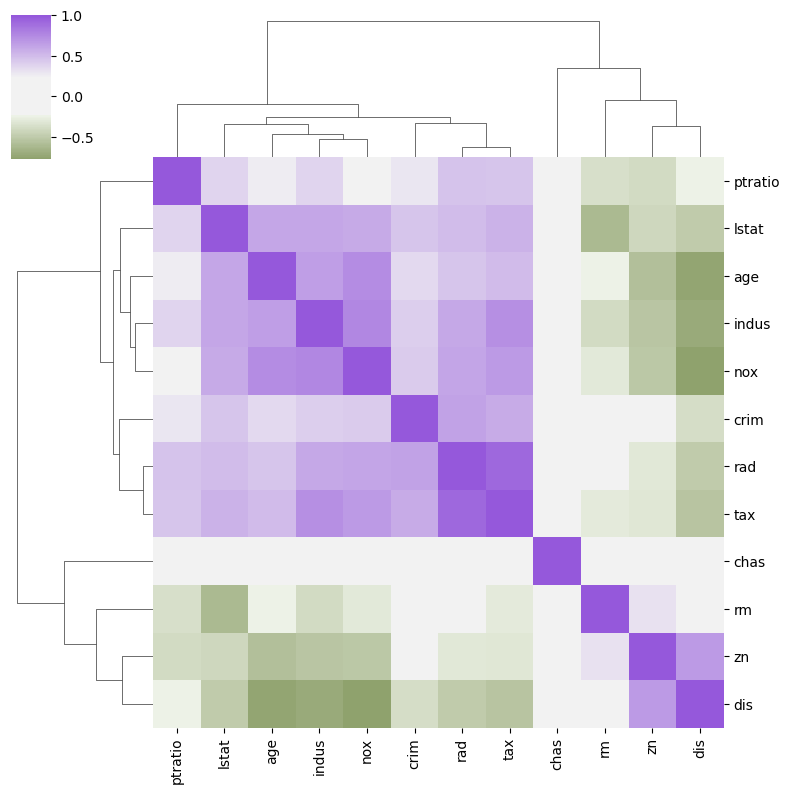

In [12]:
cmap = sns.diverging_palette(h_neg=105, h_pos=280, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(X.corr(), figsize=(8, 8), center = 0, cmap=cmap)

# construção da matriz de correlação para identificar a melhor variável com potencial preditivo

Após avaliar visualmente as variáveis, é possível que algumas variáveis tenham potencial explicativo. rankeando:
- 1: 'tax' parece ter uma maior quantidade de correlações positivas acima de 0.5 com as demais variáveis.
- 2: 'indus'
- 3: 'rad'
- 4: 'nox'

### 3. Separe os dados em validação e teste

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873) 

# separando os dados em validação e teste

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [14]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [15]:
mse3 = mean_squared_error(y_train, regr_1.predict(X_train),squared = False) # depth 2
mse4 = mean_squared_error(y_train, regr_2.predict(X_train),squared = False) # depth 8

template = "O MSE da árvore de treinamento com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse3).replace(".",","))
print(template.format(regr_2.get_depth(),mse4).replace(".",","))

O MSE da árvore de treinamento com profundidade=2 é: 5,08
O MSE da árvore de treinamento com profundidade=8 é: 1,34


In [16]:
mse1 = mean_squared_error(y_test, regr_1.predict(X_test),squared = False)   # depth 2
mse2 = mean_squared_error(y_test, regr_2.predict(X_test),squared = False)   # depth 8
 
template = "O MSE da árvore de teste com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore de teste com profundidade=2 é: 5,14
O MSE da árvore de teste com profundidade=8 é: 5,58


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Tanto em treino como em teste, o MSE da árvore com profundidade 8 foi menor. Isto pode indicar que ela seja mais pura e forneça uma análise melhor.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

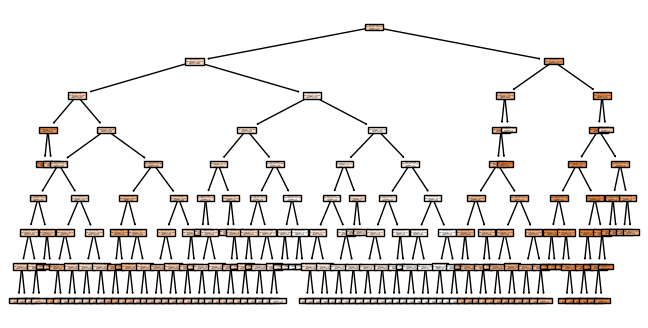

In [17]:
plt.rc('figure', figsize=(8, 4))
tp = tree.plot_tree(regr_2, 
                    feature_names=X.columns,  
                    filled=True) 

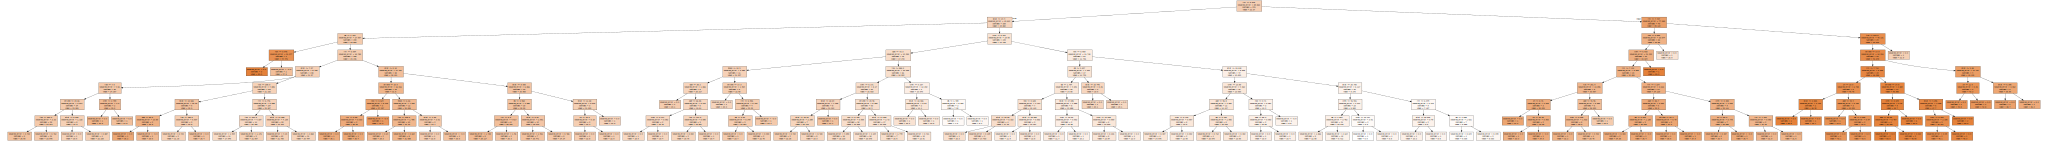

In [18]:
#DOT data
dot_data = tree.export_graphviz(regr_2, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [19]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

 # remember to load the package

viz = dtreeviz(regr_2, X, y,
                target_name="MDEV",
                feature_names=X.columns)
viz

C:\Users\khrik\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(

(process:6924): GLib-GIO-WARNING **: 20:50:42.503: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.6.2.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:6924): GLib-GIO-WARNING **: 20:50:42.509: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2304.21.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs


Foi relativamente dificil garantir a visualização de uma arvore grande como essa. Independente do modelo de visualização.
Mas, me pareceu que a variável que aparece mais vezes para definir os ramos e folhas é a 'lstat'.
No entanto, a variável 'rm', é a primeira usada para realizar a ramificação e aparece algumas muitas vezes ao longo da árvore